#**Import Library dan Resource yang akan digunakan**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

#**Inisiasi Variabel untuk menyimpan dataframe**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang  bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [ ]:
print((df.isna().sum() / len(df)) * 100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


Nilai Kosong Pada Kolom Cabin

In [ ]:
df[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Nilai kosong pada kolom age

In [ ]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Nilai kosong pada kolom embarked

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#####**Hapus Missing Values**

Karena persentase nilai kosong pada kolom ***Cabin*** lebih dari 70%, maka kolom tersebut wajib untuk dihapus

In [ ]:
df = df.drop('Cabin', axis=1)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#####**Imputasi Missing Values**

Untuk kolom ***Age***, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik kolom ***Age***

In [ ]:
df['Age'].dropna().describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom ***Age*** untuk imputasi nilai kosong tersebut

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].dropna().mean())

Untuk kolom ***Embarked*** akan kita lakukan yang sama seperti pada kolom ***Age***, yaitu dengan menggunakan nilai modus karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil)

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#####**Pengecekkan Ulang**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [ ]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


#####**Hapus Nilai Duplikat**

In [ ]:
df = df.drop_duplicates()

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Age,7.407407
SibSp,5.162738
Parch,23.905724
Fare,13.019080


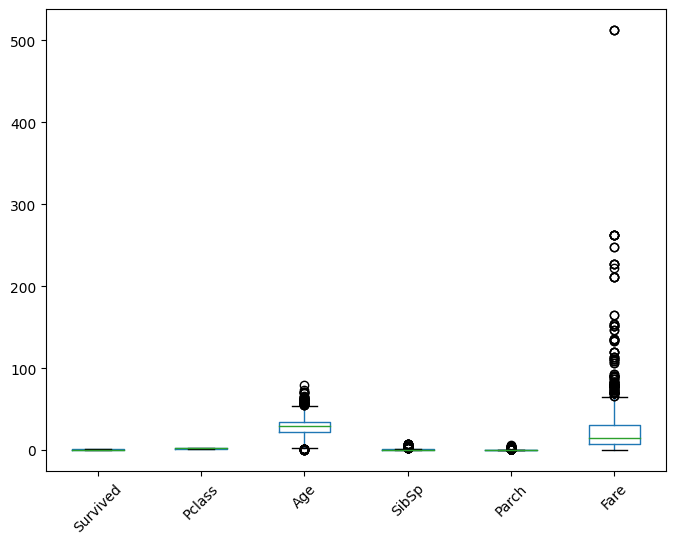

In [ ]:
boxplot = df.drop('PassengerId', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#####**Hapus Outliers**

Melakukan penghapusan baris pada kolom "Age" untuk menanganani outliers

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

#####**Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "Fare"

In [ ]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))

#####**Pengecekkan Ulang**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Age,1.818182
SibSp,4.727273
Parch,21.939394
Fare,0.000000


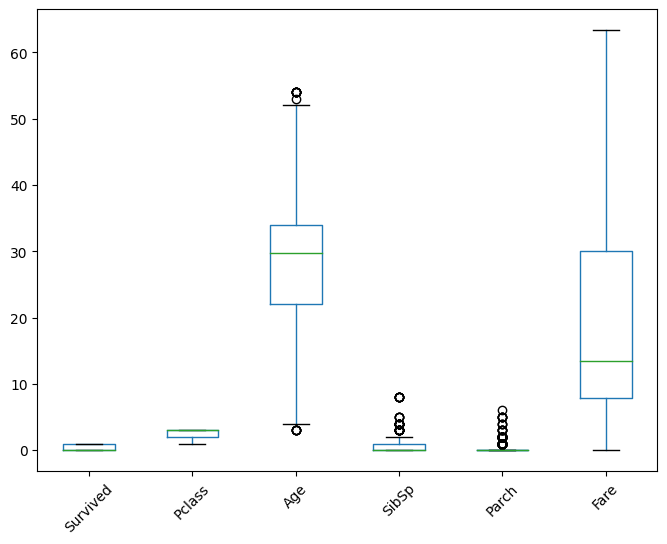

In [ ]:
boxplot = df.drop('PassengerId', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df['AgeCategory'] = df['Age'].apply(categorize_age)

###**Pengecekkan Hasil**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,63.3333,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df = df.drop(['PassengerId','Name','Ticket'], axis=1)

###**Pengecekkan Hasil**

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory
0,0,3,male,22.0,1,0,7.2500,S,Adult
1,1,1,female,38.0,1,0,63.3333,C,Adult
2,1,3,female,26.0,0,0,7.9250,S,Adult
3,1,1,female,35.0,1,0,53.1000,S,Adult
4,0,3,male,35.0,0,0,8.0500,S,Adult


#**Data Transformation**

###**Mapping**

In [ ]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})
df['AgeCategory'] = df['AgeCategory'].map({'Child': 0, 'Adult': 1,'Elder': 2}).astype(int)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory
0,0,3,1,22.000000,1,0,7.2500,S,1
1,1,1,0,38.000000,1,0,63.3333,C,1
2,1,3,0,26.000000,0,0,7.9250,S,1
3,1,1,0,35.000000,1,0,53.1000,S,1
4,0,3,1,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,1
887,1,1,0,19.000000,0,0,30.0000,S,1
888,0,3,0,29.699118,1,2,23.4500,S,1
889,1,1,1,26.000000,0,0,30.0000,C,1


###**Encoding**

In [ ]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeCategory,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,1,0,0,1
1,1,1,0,38.0,1,0,63.3333,1,1,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,0,0,1


#**Modelling**

###**Pre-Processing**

In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit(x_test)

###**Build Model**

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
prediction = dtc.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [ ]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,AgeCategory,Embarked_C,Embarked_Q,Embarked_S
663,3,1,36.000000,0,0,7.4958,1,0,0,1
191,2,1,19.000000,0,0,13.0000,1,0,0,1
73,3,1,26.000000,1,0,14.4542,1,1,0,0
185,1,1,29.699118,0,0,50.0000,1,0,0,1
300,3,0,29.699118,0,0,7.7500,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
836,3,1,21.000000,0,0,8.6625,1,0,0,1
814,3,1,30.500000,0,0,8.0500,1,0,0,1
157,3,1,30.000000,0,0,8.0500,1,0,0,1
624,3,1,21.000000,0,0,16.1000,1,0,0,1


In [ ]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
y_test

663    0
191    0
73     0
185    0
300    1
      ..
836    0
814    0
157    0
624    0
255    1
Name: Survived, Length: 248, dtype: int64

In [ ]:
x_test.shape

(248, 10)

In [ ]:
import pandas as pd

# Membuat DataFrame untuk x_test dengan reset indeks
x_test_df = pd.DataFrame(x_test).reset_index(drop=True)

y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

# Membuat DataFrame untuk hasil prediksi
prediction_df = pd.DataFrame(prediction, columns=["Prediction"])

# Menggabungkan DataFrame x_test dengan DataFrame hasil prediksi
combined_data = pd.concat([x_test_df, prediction_df], axis=1)

compare_data = pd.concat([combined_data,y_test_df], axis=1)


In [ ]:
compare_data.sample(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,AgeCategory,Embarked_C,Embarked_Q,Embarked_S,Prediction,Survived
52,3,0,45.0,0,1,14.4542,1,1,0,0,0,0
